<a href="https://colab.research.google.com/github/ChrisCT17/TareasTHC/blob/main/Actividad_14_de_noviembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import matplotlib.pyplot as plt #importamos las bibliotecas
import numpy as np
import pandas as pd
from numpy import linalg as LA

Supongamos que tenemos un conjunto de puntos desde (x1,y1) hasta (xn,yn), lo que podemos hacer es generar una recta de tal manera que la distancia entre los puntos a la recta sea la menor posible

Para ello podemos generar una ecuacion de la recta de la forma y=mx+b para cada punto. Podemos juntar todas estas ecuaciones en una matriz. Esta tiene los coeficientes de b que es 1 & todas las xn multiplicado por el vector b m igualada a todas las yn. Lo mismo podemos hacer con ecuaciones cuadraticas para ajustar una parabola a los datos.

In [33]:
def get_data(N):
  x=np.linspace(0,2,N) #Da N puntos entre el 0 y el 2
  y=np.zeros_like(x)
  eps=1E-1 #esto es 1 por 10 a la -1
  for i in range(N):
    y[i]=2*x[i]+3+(eps*(-1)**i) #Definimos las rectas multiplicadas por epsilon para ajustar lo mas minimamente, ademas el -1 actua como forma tambien de ajuste bajando o subiendo el punto
  return x,y

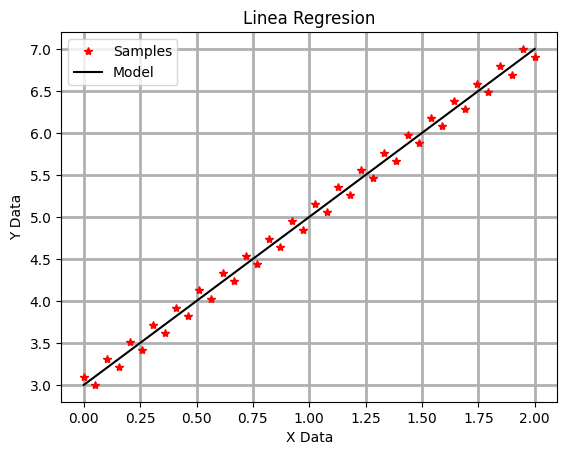

In [30]:
def plot_data(x,y):
  z=2*x+3
  plt.plot(x,y,"r*",label="Samples") #"r*" indica color rojo con estrellita
  plt.plot(x,z,"-k",label="Model") #"-k"
  plt.title("Linea Regresion")
  plt.xlabel("X Data")
  plt.ylabel("Y Data")
  plt.grid(lw=2)
  plt.legend()
  plt.show()
x,y=get_data(40)
plot_data(x,y)

In [34]:
def plot_data(x,y,params):
  z=params[0]+params[1]*x

  plt.figure()
  plt.plot(x,y,"r*",label="Samples") #"r*" indica color rojo con estrellita
  plt.plot(x,z,"-k",label="Model") #"-k"
  plt.title("Linea Regresion")
  plt.xlabel("X Data")
  plt.ylabel("Y Data")
  plt.grid(lw=2)
  plt.legend()
  plt.show()

In [45]:
def linear_regression(N=20):
  x,y=get_data(N)
  A=np.vstack([np.ones(len(x)),x]).T #T es la transpuesta
  #el b es la y
  AtA=A.T@A
  Aty=A.T@y
  params=LA.solve(AtA,Aty)
  plot_data(x,y,params)
  return params

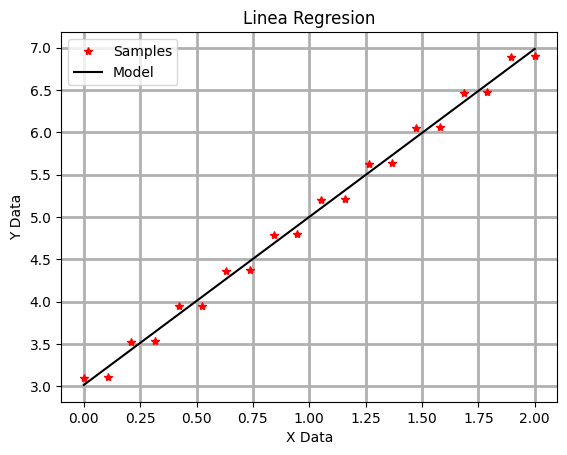

array([3.01428571, 1.98571429])

In [46]:
linear_regression()


Ahora ajustamos una parabola a los datos

In [47]:
def get_data1(N):
  x=np.linspace(0,2,N) #Da N puntos entre el 0 y el 2
  y=np.zeros_like(x)
  eps=1E-1 #esto es 1 por 10 a la -1
  for i in range(N):
    y[i]=3*x[i]**2+5*x[i]-2+5*(eps*(-1)**i) #Definimos las rectas multiplicadas por epsilon para ajustar lo mas minimamente, ademas el -1 actua como forma tambien de ajuste bajando o subiendo el punto

  return x,y

In [48]:
def plot_data1(x,y,params1):
  z=params1[0]+params1[1]*x+params1[2]*x**2
  plt.figure()
  plt.plot(x,y,"r*",label="Samples") #"r*" indica color rojo con estrellita, son los datos o puntos
  plt.plot(x,z,"-k",label="Model") #"-k"
  plt.title("Cuadratic Regression")
  plt.xlabel("X Data")
  plt.ylabel("Y Data")
  plt.grid(lw=2)
  plt.legend()
  plt.show()

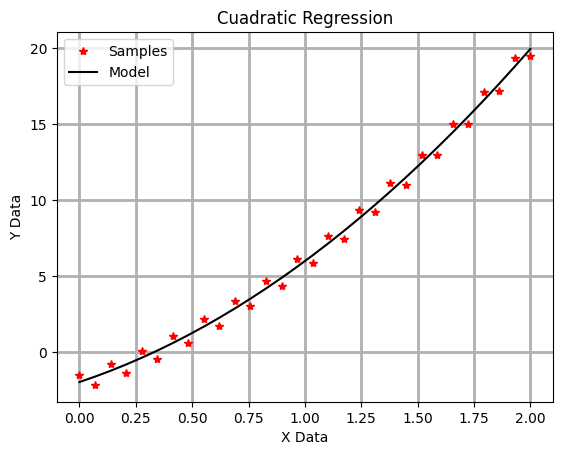

Error:  6.800000000000001 %


array([-1.9516129,  4.9516129,  3.       ])

In [56]:
def cuadratic_regression(N=20): #Si generamos la matriz tendria tendria 5 por 3 columnas
  x,y=get_data1(N)
  B=np.vstack([np.ones(len(x)),x,x**2]).T #T es la transpuesta
  #el b es la y
  BtB=B.T@B
  Bty=B.T@y
  params1=LA.solve(BtB,Bty)
  plot_data1(x,y,params1)
  Oridata=np.array([-2.,5.,3.])
  Error=np.round(LA.norm(params1-Oridata),3) #Indica el error que tenemos en aproximar la parabola
  print("Error: ",Error*100,"%")
  return params1
cuadratic_regression(N=30)